In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

def make_system(alpha, beta, gamma, delta):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(x=1,y=1)
    init /= np.sum(init)

    t0 = 0
    t_end = 200

    return System(init=init, t0=t0, t_end=t_end,
                  alpha=alpha, beta=beta, gamma=gamma, delta=delta)

In [2]:
def plot_results(x,y):
    plot(x, '--', label='Elk')
    plot(y, '-', label='Wolves')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of Population')

In [3]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [4]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (s, i, r)
    t: time
    system: System object
    
    returns: State (sir)
    """
    x, y = state

    elk = system.alpha * x - system.beta * x * y
    wolves = system.delta * x * y - system.gamma * y
    
    x += elk
    y += wolves
    
    return State(x=x, y=y)

In [5]:
system = make_system(.05, .1, .1, .1)
results = run_simulation(system, update_func)
results.head()

,x,y
0,0.500000,0.500000
1,0.500000,0.475000
2,0.501250,0.451250
3,0.503694,0.428744
4,0.507283,0.407465


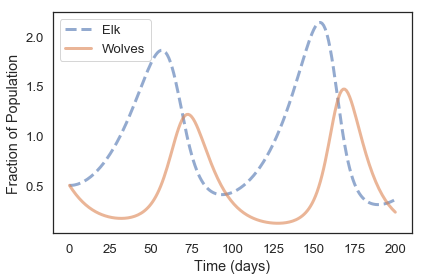

In [6]:
plot_results(results.x, results.y)